<a href="https://colab.research.google.com/github/VyniHenrique/AtvDS/blob/main/Atv_04_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Carregar o dataset a partir do arquivo 'train.csv'
# Certifique-se de que o arquivo 'train.csv' esteja na mesma pasta que o script.
try:
    df_original = pd.read_csv('train.csv')
except FileNotFoundError:
    print("Erro: O arquivo 'train.csv' não foi encontrado.")
    print("Por favor, certifique-se de que o arquivo está no mesmo diretório do script.")
    exit()


# --- Pré-processamento para o Heatmap ---
# Copia o dataframe original para não alterar os dados usados nos gráficos anteriores.
df_processed = df_original.copy()

# Preenche os valores ausentes de 'Age' com a mediana.
df_processed['Age'].fillna(df_processed['Age'].median(), inplace=True)
# Converte a coluna 'Sex' para valores numéricos.
df_processed['Sex'] = df_processed['Sex'].map({'male': 0, 'female': 1})
# Remove colunas que não serão usadas na matriz de correlação.
df_processed.drop(['Name', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)


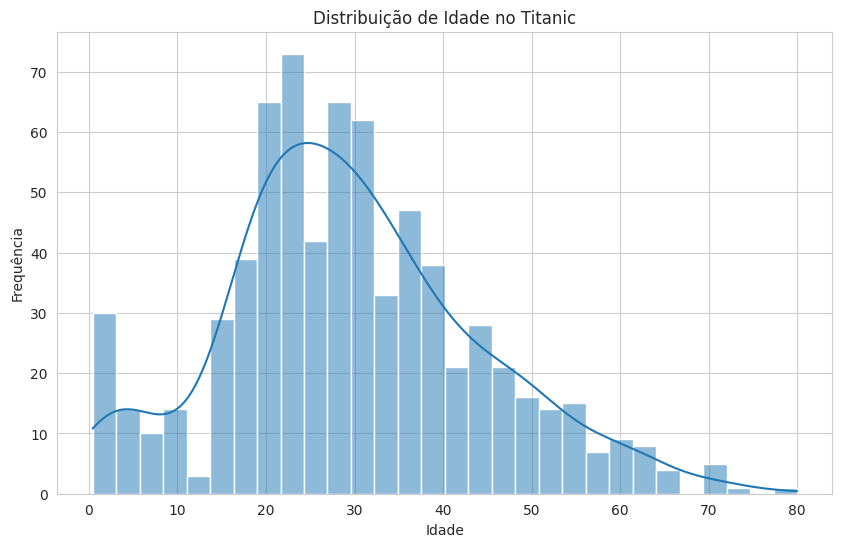

In [11]:
# Histograma de Idade
# Cria uma figura e um conjunto de subplots.
plt.figure(figsize=(10, 6))
# Plota o histograma da coluna 'Age', removendo valores nulos (dropna).
sns.histplot(df_original['Age'].dropna(), kde=True, bins=30)
# Define o título e os rótulos dos eixos.
plt.title('Distribuição de Idade no Titanic')
plt.xlabel('Idade')
plt.ylabel('Frequência')
# Mostra o gráfico em uma nova janela.
plt.show()

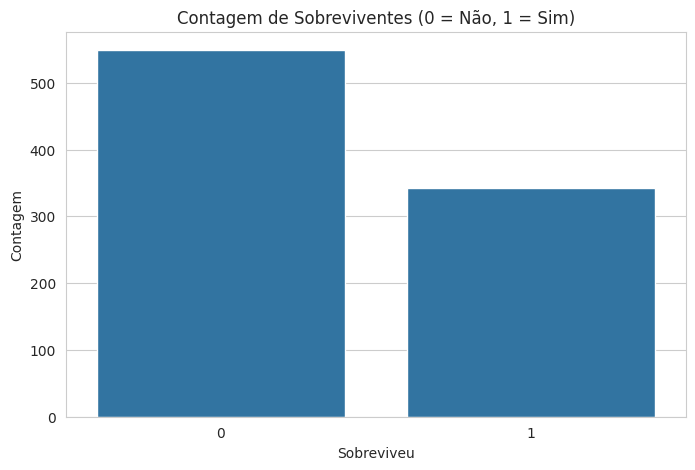

In [12]:
plt.figure(figsize=(8, 5))
# Plota um gráfico de contagem para a coluna 'Survived'.
sns.countplot(x='Survived', data=df_original)
plt.title('Contagem de Sobreviventes (0 = Não, 1 = Sim)')
plt.xlabel('Sobreviveu')
plt.ylabel('Contagem')
# Mostra o gráfico.
plt.show()

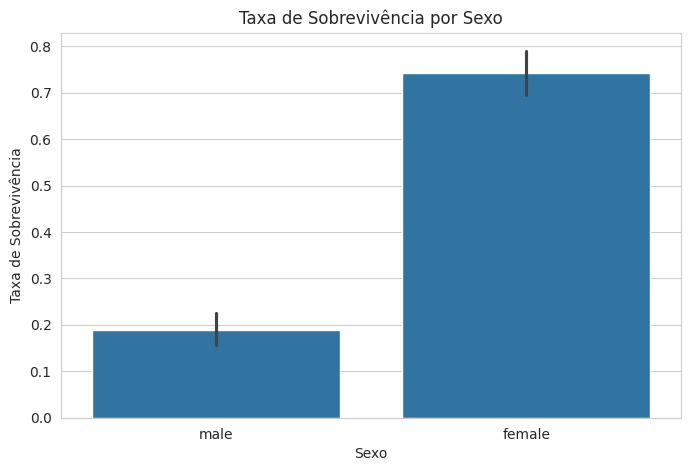

In [13]:
plt.figure(figsize=(8, 5))
# Plota um gráfico de barras mostrando a média de 'Survived' para cada 'Sex'.
sns.barplot(x='Sex', y='Survived', data=df_original)
plt.title('Taxa de Sobrevivência por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Taxa de Sobrevivência')
# Mostra o gráfico.
plt.show()

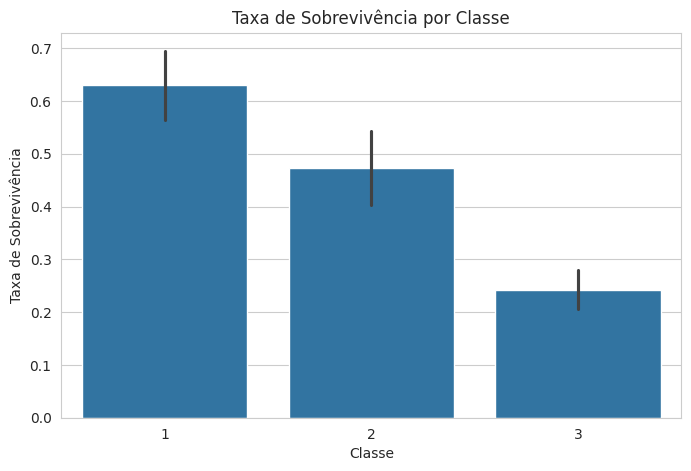

In [14]:
plt.figure(figsize=(8, 5))
# Plota um gráfico de barras mostrando a média de 'Survived' para cada 'Pclass'.
sns.barplot(x='Pclass', y='Survived', data=df_original)
plt.title('Taxa de Sobrevivência por Classe')
plt.xlabel('Classe')
plt.ylabel('Taxa de Sobrevivência')
# Mostra o gráfico.
plt.show()

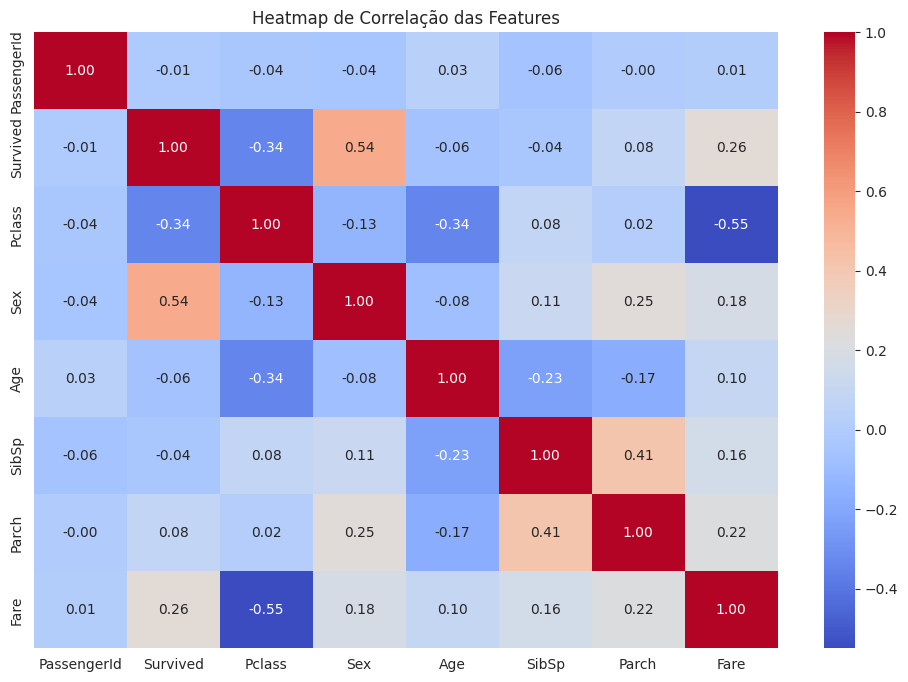

In [15]:
# Heatmap de Correlação
plt.figure(figsize=(12, 8))
# Calcula a correlação entre as colunas e plota o heatmap.
sns.heatmap(df_processed.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap de Correlação das Features')
# Mostra o gráfico.
plt.show()